Report generated successfully: sales_report.html
Script completed. Open 'sales_report.html' in your browser to view the report.


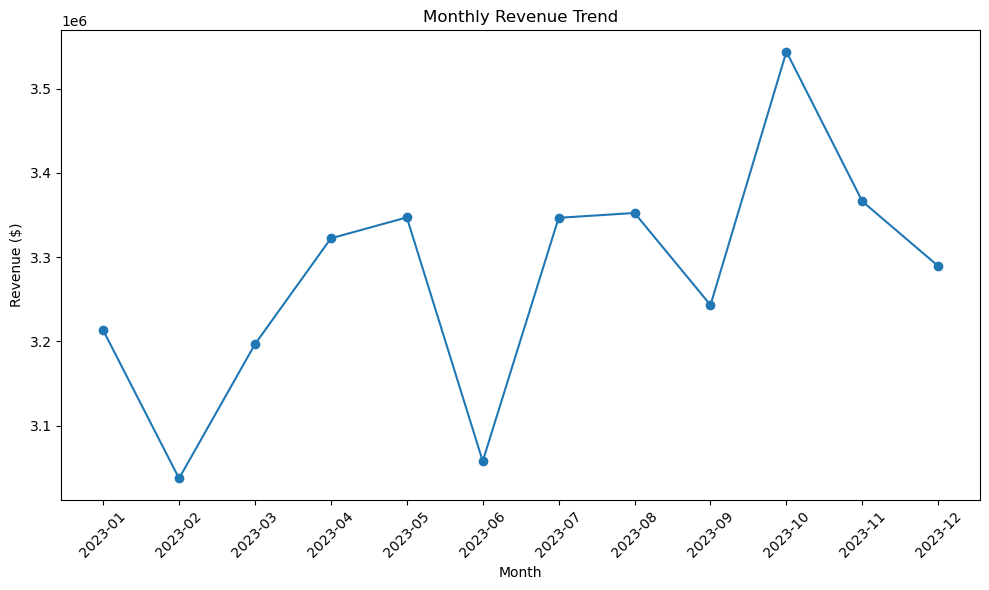

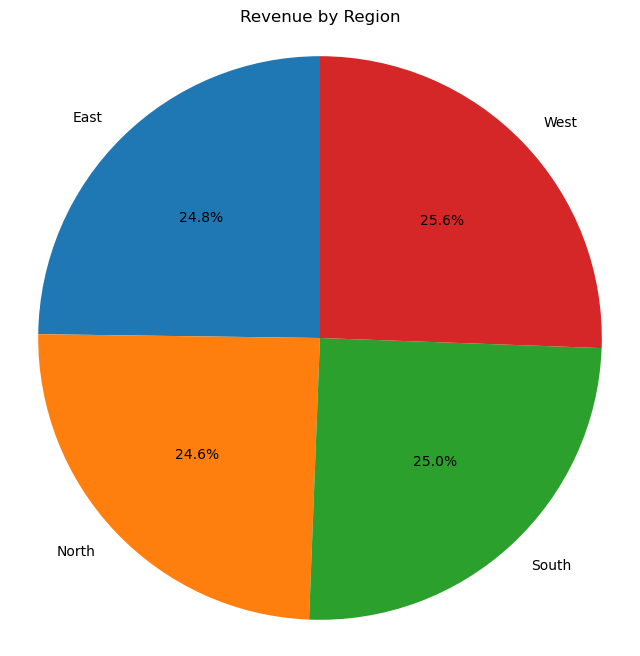

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Create sample data - sales data for a fictional company
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
products = ['Product A', 'Product B', 'Product C', 'Product D']
regions = ['North', 'South', 'East', 'West']

# Generate random sales data
data = []
for date in dates:
    for product in products:
        for region in regions:
            sales = np.random.randint(10, 100)
            revenue = sales * np.random.randint(50, 200)
            data.append([date, product, region, sales, revenue])

# Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Product', 'Region', 'Units_Sold', 'Revenue'])

# Data Analysis
def generate_sales_report(data, output_file='sales_report.html'):
    # Set up the report
    report = []
    report.append("<html><head><style>")
    report.append("body {font-family: Arial, sans-serif; margin: 20px;}")
    report.append("h1, h2 {color: #2c3e50;}")
    report.append("table {border-collapse: collapse; width: 100%;}")
    report.append("th, td {border: 1px solid #ddd; padding: 8px; text-align: left;}")
    report.append("th {background-color: #f2f2f2;}")
    report.append("tr:nth-child(even) {background-color: #f9f9f9;}")
    report.append(".chart-container {margin: 20px 0; text-align: center;}")
    report.append("</style></head><body>")
    
    # Report header
    report.append(f"<h1>Sales Performance Report</h1>")
    report.append(f"<p>Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}</p>")
    
    # Overall summary
    total_revenue = data['Revenue'].sum()
    total_units = data['Units_Sold'].sum()
    report.append("<h2>Executive Summary</h2>")
    report.append(f"<p>Total Revenue: ${total_revenue:,.2f}</p>")
    report.append(f"<p>Total Units Sold: {total_units:,}</p>")
    
    # Monthly trends
    monthly_data = data.copy()
    monthly_data['Month'] = monthly_data['Date'].dt.strftime('%Y-%m')
    monthly_summary = monthly_data.groupby('Month').agg({
        'Revenue': 'sum',
        'Units_Sold': 'sum'
    }).reset_index()
    
    # Create monthly trend chart
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_summary['Month'], monthly_summary['Revenue'], marker='o')
    plt.title('Monthly Revenue Trend')
    plt.xlabel('Month')
    plt.ylabel('Revenue ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('monthly_trend.png')
    
    report.append("<h2>Monthly Revenue Trend</h2>")
    report.append("<div class='chart-container'>")
    report.append("<img src='monthly_trend.png' alt='Monthly Revenue Trend' width='800'>")
    report.append("</div>")
    
    # Product performance
    product_summary = data.groupby('Product').agg({
        'Revenue': 'sum',
        'Units_Sold': 'sum'
    }).reset_index().sort_values('Revenue', ascending=False)
    
    report.append("<h2>Product Performance</h2>")
    report.append("<table>")
    report.append("<tr><th>Product</th><th>Revenue</th><th>Units Sold</th></tr>")
    for _, row in product_summary.iterrows():
        report.append(f"<tr><td>{row['Product']}</td><td>${row['Revenue']:,.2f}</td><td>{row['Units_Sold']:,}</td></tr>")
    report.append("</table>")
    
    # Regional performance
    plt.figure(figsize=(8, 8))
    region_summary = data.groupby('Region')['Revenue'].sum()
    plt.pie(region_summary, labels=region_summary.index, autopct='%1.1f%%', startangle=90)
    plt.title('Revenue by Region')
    plt.axis('equal')
    plt.savefig('region_pie.png')
    
    report.append("<h2>Regional Performance</h2>")
    report.append("<div class='chart-container'>")
    report.append("<img src='region_pie.png' alt='Revenue by Region' width='500'>")
    report.append("</div>")
    
    # Conclusion
    report.append("<h2>Conclusion and Recommendations</h2>")
    top_product = product_summary.iloc[0]['Product']
    top_region = region_summary.idxmax()
    report.append(f"<p>Based on the analysis, {top_product} is our best-performing product, and the {top_region} region shows the strongest sales performance.</p>")
    report.append("<p>Recommendations:</p>")
    report.append("<ul>")
    report.append(f"<li>Increase marketing efforts for {top_product} in other regions</li>")
    report.append(f"<li>Investigate successful strategies in the {top_region} region for application elsewhere</li>")
    report.append("<li>Consider product improvements for lower-performing items</li>")
    report.append("</ul>")
    
    # Close the HTML
    report.append("</body></html>")
    
    # Write the report to a file
    with open(output_file, 'w') as f:
        f.write('\n'.join(report))
    
    print(f"Report generated successfully: {output_file}")

# Generate the report
generate_sales_report(df)

print("Script completed. Open 'sales_report.html' in your browser to view the report.")


This script:

1. Creates sample sales data for a fictional company
2. Analyzes the data to extract key insights
3. Generates visualizations (monthly trend chart and regional pie chart)
4. Produces an HTML report with formatted tables and embedded charts
5. Includes an executive summary, data analysis, and recommendations

The report includes:
- An executive summary with total revenue and units sold
- Monthly revenue trends with a line chart
- Product performance comparison in a table
- Regional performance visualization with a pie chart
- Conclusions and recommendations based on the data

To run this script, you'll need the following Python packages:
- pandas (for data manipulation)
- matplotlib (for creating charts)
- seaborn (for enhanced visualizations)
- numpy (for numerical operations)

The HTML report will be saved in your working directory, and you can open it with any web browser.